In [1]:
from matplotlib.patches import Circle, Rectangle, Arc, Ellipse

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)
    
    left_corner = Rectangle((-250,-47), 30, 120, linewidth = lw, color = color, fill = False)
    right_corner = Rectangle((220,-47),30,120,linewidth = lw,color = color, fill =False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc, left_corner,right_corner]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc, Ellipse

In [3]:
TeamShots = pd.read_csv("Data/NBAShots_2000_2019.csv")

# Add a new variable that combines the two shot zone variables into one
TeamShots['ZONE_DETAIL'] = TeamShots[['SHOT_ZONE_BASIC','SHOT_ZONE_AREA']].apply(lambda x: '-'.join(x).replace(" ", "_"), axis = 1)
# Combine both Backcourt zones into one
TeamShots.loc[TeamShots.ZONE_DETAIL == 'Backcourt-Back_Court(BC)','ZONE_DETAIL'] = 'Backcourt'
TeamShots.loc[TeamShots.ZONE_DETAIL == 'Above_the_Break_3-Back_Court(BC)','ZONE_DETAIL'] = 'Backcourt'


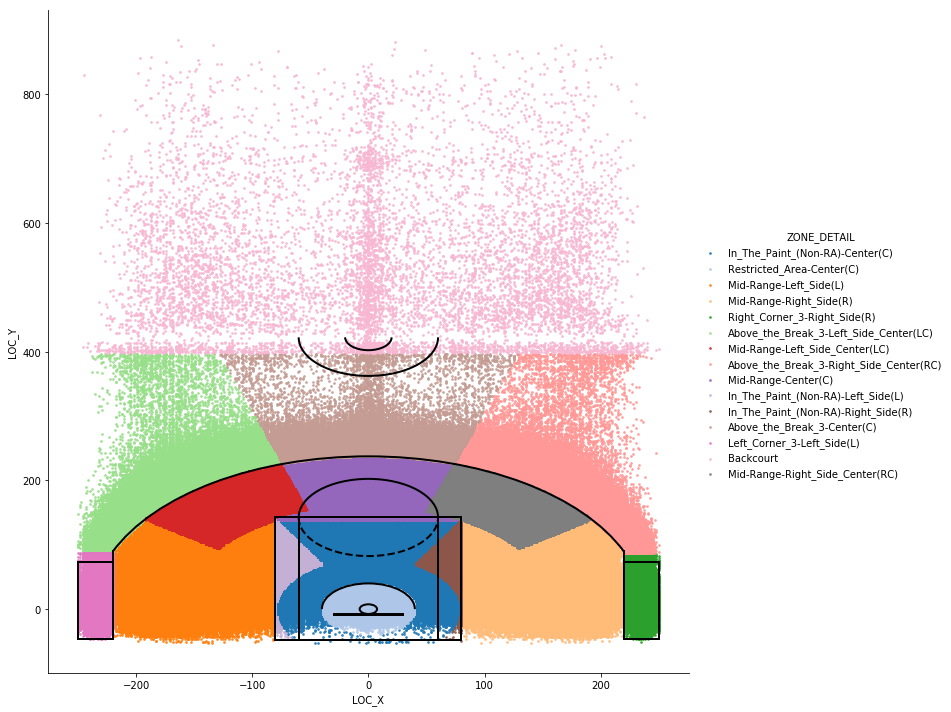

In [4]:

ax = sns.lmplot(data = TeamShots, x = 'LOC_X', y = 'LOC_Y', hue = 'ZONE_DETAIL',
            palette = 'tab20', fit_reg = False, scatter_kws = {'s':3}, height = 10)
draw_court(ax.ax)
plt.show()

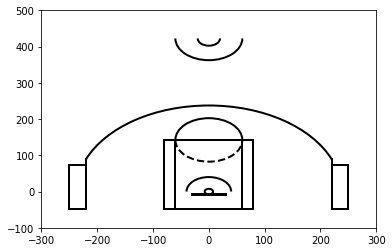

In [5]:
plt.figure()
ax = draw_court()

plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

In [6]:
TeamShots.groupby('ZONE_DETAIL')['LOC_X','LOC_Y'].describe()

LOC_X                          \
                                             count        mean         std   
ZONE_DETAIL                                                                  
Above_the_Break_3-Center(C)               153938.0    1.099339   44.014578   
Above_the_Break_3-Left_Side_Center(LC)    255197.0 -159.891319   40.294070   
Above_the_Break_3-Right_Side_Center(RC)   251592.0  156.595711   40.672206   
Backcourt                                   9456.0   10.491751  122.459671   
In_The_Paint_(Non-RA)-Center(C)           465350.0    1.209810   39.361689   
In_The_Paint_(Non-RA)-Left_Side(L)         37262.0  -66.996323    9.604794   
In_The_Paint_(Non-RA)-Right_Side(R)        38368.0   67.508679    9.661745   
Left_Corner_3-Left_Side(L)                121151.0 -231.735751    5.750197   
Mid-Range-Center(C)                       169438.0    1.194826   31.870546   
Mid-Range-Left_Side(L)                    323619.0 -144.202769   34.533830   
Mid-Range-Left_Side_Center(LC)            161835.0 -112.197176   28.118222   
Mid-Range-Right_Side(R)                   295003.0  143.204154   35.066931   
Mid-Range-Right_Side_Center(RC)           175641.0  111.990207   27.894753   
Restricted_Area-Center(C)                1206042.0    0.706813   11.082166   
Right_Corner_3-Right_Side(R)              112650.0  231.990031    5.480929   

                                                                            \
                                           min    25%    50%    75%    max   
ZONE_DETAIL                                                                  
Above_the_Break_3-Center(C)             -128.0  -32.0    1.0   36.0  128.0   
Above_the_Break_3-Left_Side_Center(LC)  -250.0 -192.0 -161.0 -128.0  -74.0   
Above_the_Break_3-Right_Side_Center(RC)   74.0  125.0  157.0  189.0  250.0   
Backcourt                               -246.0  -97.0    6.0  119.0  250.0   
In_The_Paint_(Non-RA)-Center(C)          -80.0  -30.0    1.0   34.0   80.0   
In_The_Paint_(Non-RA)-Left_Side(L)       -80.0  -75.0  -68.0  -60.0  -41.0   
In_The_Paint_(Non-RA)-Right_Side(R)       41.0   61.0   69.0   75.0   80.0   
Left_Corner_3-Left_Side(L)              -250.0 -235.0 -232.0 -228.0 -220.0   
Mid-Range-Center(C)                      -79.0  -21.0    1.0   24.0   79.0   
Mid-Range-Left_Side(L)                  -220.0 -171.0 -147.0 -115.0  -81.0   
Mid-Range-Left_Side_Center(LC)          -191.0 -133.0 -113.0  -90.0  -50.0   
Mid-Range-Right_Side(R)                   81.0  113.0  146.0  171.0  220.0   
Mid-Range-Right_Side_Center(RC)           50.0   90.0  113.0  133.0  190.0   
Restricted_Area-Center(C)                -39.0    0.0    0.0    3.0   39.0   
Right_Corner_3-Right_Side(R)             220.0  228.0  232.0  236.0  250.0   

                                             LOC_Y                          \
                                             count        mean         std   
ZONE_DETAIL                                                                  
Above_the_Break_3-Center(C)               153938.0  253.580338   17.926208   
Above_the_Break_3-Left_Side_Center(LC)    255197.0  192.586359   40.970169   
Above_the_Break_3-Right_Side_Center(RC)   251592.0  195.033260   41.129043   
Backcourt                                   9456.0  532.806472  109.683563   
In_The_Paint_(Non-RA)-Center(C)           465350.0   57.882093   35.774996   
In_The_Paint_(Non-RA)-Left_Side(L)         37262.0   70.900542   26.641551   
In_The_Paint_(Non-RA)-Right_Side(R)        38368.0   70.344245   27.574014   
Left_Corner_3-Left_Side(L)                121151.0   14.654217   25.436560   
Mid-Range-Center(C)                       169438.0  180.677906   23.576328   
Mid-Range-Left_Side(L)                    323619.0   38.739833   39.071217   
Mid-Range-Left_Side_Center(LC)            161835.0  151.265394   24.082312   
Mid-Range-Right_Side(R)                   295003.0   39.572347   39.084389   
Mid-Range-Right_Side_Center(RC)           175641.0  152.510496   

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


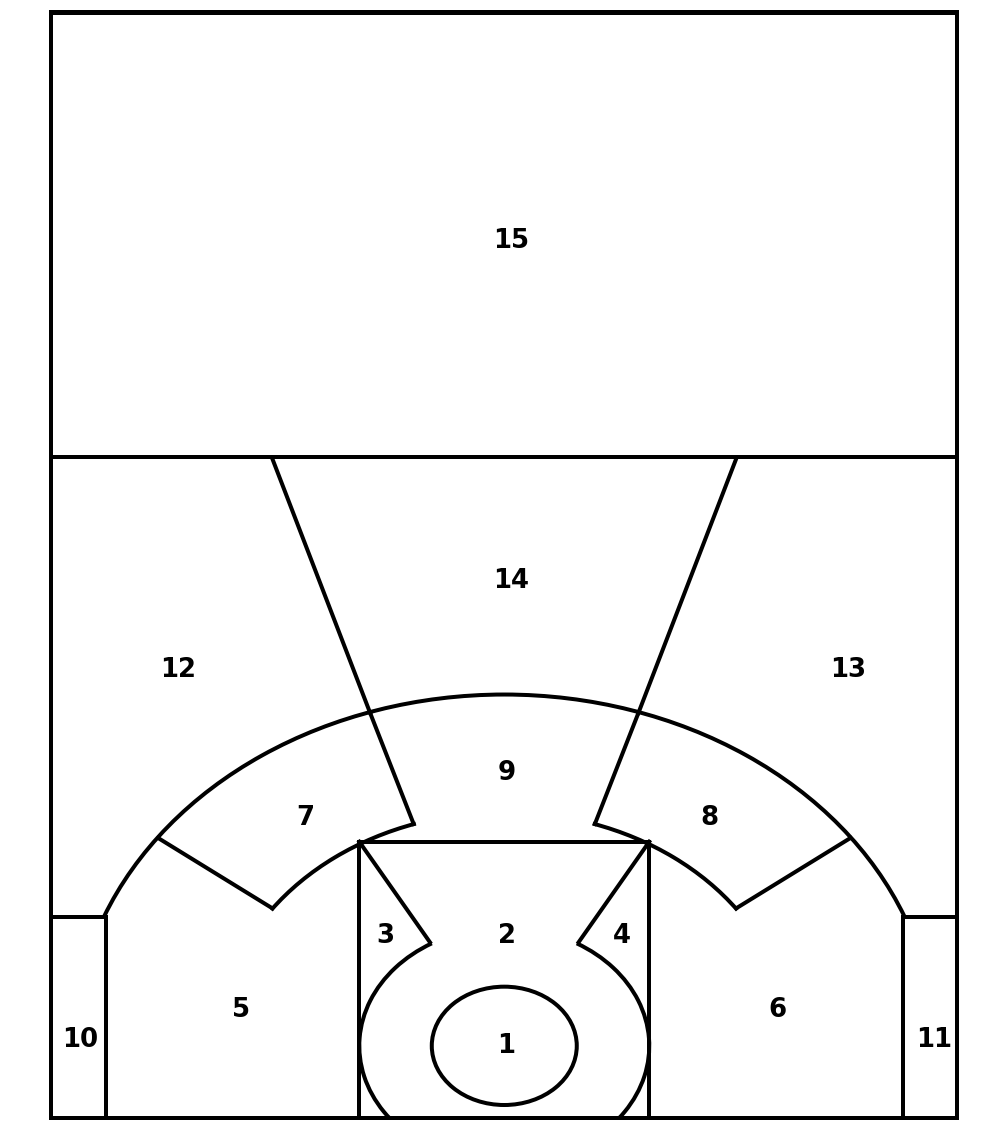

In [6]:
#ax = sns.lmplot(data = TeamShots, x = 'LOC_X', y = 'LOC_Y', hue = 'ZONE_DETAIL',
#            palette = 'tab20', fit_reg = False, scatter_kws = {'s':3}, height = 10)

fig,ax = plt.subplots(1,1,figsize = (14,16))

left_corner = Rectangle((-250,-49), 30, 136, linewidth = 4, color = "k", fill = False)
right_corner = Rectangle((220,-49), 30, 136, linewidth = 4, color = "k", fill = False)
backcourt = Rectangle((-250,398), 500, 300, linewidth = 4, color = "k", fill = False)
ra = Ellipse((0,0), 80, 80, linewidth = 4, color = "k", fill = False)
arc = Arc((0, 0), 475, 475, theta1=21.57, theta2=180 - 21.57, linewidth=4, color="k")
right_mid_2 = Arc((0,0), 316, 316, theta1=35.5, theta2=72, linewidth=4, color="k")
left_mid_2 = Arc((0,0), 316, 316, theta1 = 108, theta2 = 144.5, linewidth=4, color="k")

test = Arc((0,0), 160, 160, theta1 = -240, theta2 =60, linewidth = 4, color = "k")
box = Rectangle((-80,-49),160,49 + 138,linewidth = 4, color = "k", fill = False)
whole = Rectangle((-250,-49),500,49+700, linewidth = 4, color = "k", fill = False)
ax.plot([74,128],[225,397],linewidth = 4, color = "k")
ax.plot([-74,-128],[225,397],linewidth = 4, color = "k")
ax.plot([50,74],[150,225],linewidth = 4, color = "k")
ax.plot([-50,-74],[150,225],linewidth = 4, color = "k")
ax.plot([128,191],[93,140.5],linewidth = 4, color = "k")
ax.plot([-128,-191],[93,140.5],linewidth = 4, color = "k")
ax.plot([41,80],[70,138],linewidth = 4,color ="k")
ax.plot([-41,-80],[70,138],linewidth = 4,color = "k")

add = [left_corner, right_corner, backcourt, ra, arc, right_mid_2, left_mid_2, test,box, whole]

ax.text(-4,-4,"1",fontsize = 26,fontname="Helvetica",fontweight = "bold", label = "Restricted Area")
ax.text(-3.5,70,"2",fontsize = 26,fontname="Helvetica",fontweight = "bold",label="In the Paint, Center")
ax.text(-70.5,70,"3",fontsize = 26,fontname="Helvetica",fontweight = "bold",label="In the Paint, Left")
ax.text(60,70,"4",fontsize = 26,fontname="Helvetica",fontweight = "bold",label="In the Paint, Right")
ax.text(-150,20,"5",fontsize = 26,fontname="Helvetica",fontweight = "bold",label="Mid-Range, Left")
ax.text(146,20,"6",fontsize = 26,fontname="Helvetica",fontweight = "bold",label="Mid-Range, Right")
ax.text(-115,150,"7",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Mid-Range, Center-Left")
ax.text(108,150,"8",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Mid-Range, Center-Right")
ax.text(-3.5,180,"9",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Mid-Range, Center")
ax.text(-244,0,"10",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Left Corner 3")
ax.text(227,0,"11",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Right Corner 3")
ax.text(-190,250,"12",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Above the Break 3, Left")
ax.text(180,250,"13",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Above the Break 3, Right")
ax.text(-6,310,"14",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Above the Break 3, Center")
ax.text(-6,540,"15",fontsize = 26,fontname = "Helvetica",fontweight = "bold",label = "Backcourt")




for a in add:
    ax.add_patch(a)
    
plt.xlim([-260,270])
plt.ylim([-50,700])
plt.axis('off')
plt.tight_layout()

plt.savefig("test.png")

plt.show()

In [90]:
87 - -47

134

In [34]:
316*316*.5*.5 - 150*150

2464.0

In [35]:
2464**.5

49.63869458396343